In [1]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract
from tesserocr import PyTessBaseAPI
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
def prepare(image, name, crop=None, brightness_border = 180, scale=0):
    if(crop!=None):
        image = image.crop(crop)
        image.save(name)
    bw_name = name[0:-4] + '_bw.jpg'
    column = image
    gray = column.convert('L')
    blackwhite = gray.point(lambda x: 0 if x < brightness_border else 255, '1')
    newimg1 = Image.new('RGB', size=[x*(scale*2 + 1) for x in blackwhite.size], color='white')
    newimg1.paste(blackwhite, [x*scale for x in blackwhite.size])
    newimg1.save(bw_name)
    return blackwhite

def show(image, crop, color="green", width=3):
    d = ImageDraw.Draw(image)
    d.rectangle(crop, outline=color, width=width)
    image.show()

In [4]:
def birth_date(brightness_border=180, scale=1):
    base = Image.open('final_pass15.jpg').convert('RGB')

    birth_date_crop=[x//2 for x in base.size]*2;
    #print(birth_date_crop)
    birth_date_crop[0]+=-1120
    birth_date_crop[1]+=775
    birth_date_crop[2]+=320
    birth_date_crop[3]+=895
    #show(base, birth_date_crop)
    prepare(base, "birth_date.jpg", birth_date_crop, brightness_border=brightness_border, scale=scale)
    return "birth_date_bw.jpg"

In [5]:
def birth_place(brightness_border=180, scale=1):
    base = Image.open('final_pass15.jpg').convert('RGB')

    birth_place_crop=[x//2 for x in base.size]*2;
    #print(birth_place_crop)
    birth_place_crop[0]+=-30
    birth_place_crop[1]+=860
    birth_place_crop[2]+=1050
    birth_place_crop[3]+=1060
    #print(birth_place_crop)
    #show(base, birth_place_crop)
    prepare(base, "birth_place.jpg", birth_place_crop, brightness_border=brightness_border, scale=scale)
    return "birth_place_bw.jpg"

In [6]:
def personal_number(brightness_border=180, scale=1):
    base = Image.open('final_pass15.jpg').convert('RGB')

    personaln_crop=[x//2 for x in base.size]*2;
    #print(personaln_crop)
    personaln_crop[0]+=370
    personaln_crop[1]+=760
    personaln_crop[2]+=1120
    personaln_crop[3]+=860
    #print(personaln_crop)
    #show(base, personaln_crop)
    prepare(base, "personal_number.jpg", personaln_crop, brightness_border=brightness_border, scale=scale)
    return "personal_number_bw.jpg"

In [7]:
def issuing_date(brightness_border=180, scale=1):
    base = Image.open('final_pass15.jpg').convert('RGB')

    personaln_crop=[x//2 for x in base.size]*2;
    #print(personaln_crop)
    personaln_crop[0]+=-1010
    personaln_crop[1]+=1330
    personaln_crop[2]+=-470
    personaln_crop[3]+=1400   
    #print(personaln_crop)
    #show(base, personaln_crop)
    prepare(base, "issuing_date.jpg", personaln_crop, brightness_border=brightness_border, scale=scale)
    return "issuing_date_bw.jpg"

In [8]:
def expiration_date(brightness_border=180, scale=1):
    base = Image.open('final_pass15.jpg').convert('RGB')

    personaln_crop=[x//2 for x in base.size]*2;
    #print(personaln_crop)
    personaln_crop[0]+=350
    personaln_crop[1]+=1330
    personaln_crop[2]+=1150
    personaln_crop[3]+=1400  
    #print(personaln_crop)
    #show(base, personaln_crop)
    prepare(base, "expiration_date.jpg", personaln_crop, brightness_border=brightness_border, scale=scale)
    return "expiration_date_bw.jpg"

In [9]:
base = Image.open('final_pass16.jpg').convert('RGB')
print([x//2 for x in base.size]*2)

[1230, 1735, 1230, 1735]


In [ ]:
def personal_number(open_fnamebrightness_border=180, scale=1):
    base = Image

In [216]:
image = Image.open(birth_date())
birth_date = pytesseract.image_to_string(image, lang='rus')
image = Image.open(issuing_date())
issuing_date = pytesseract.image_to_string(image, lang='rus')
image = Image.open(expiration_date())
expiration_date = pytesseract.image_to_string(image, lang='rus')
image = Image.open(birth_place())
birth_place = pytesseract.image_to_string(image, lang='rus')
print("birth date:", birth_date)
print("birth_place:", birth_place)
print("issuing_date:", issuing_date)
print("expiration_date:", expiration_date)

birth date: 21 05 1977
birth_place: РЕСПУБЛИКА БЕЛАРУСЬ, Г МИНСК
issuing_date: 11 09 2002
expiration_date: 21 05 2022


brightness_border is  160
rel: 21 05 2022


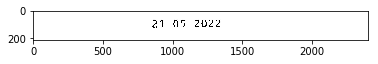

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 гОгг2    False
bel: 21 05 2022    True
osd: 2า 05 2022    False
brightness_border is  165
rel: 21 05 2022


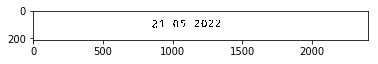

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 ггг    False
bel: 21 05 2022    True
osd: 2า 05 2022    False
brightness_border is  170
rel: 21 05 2022


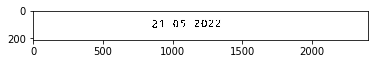

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 ггг    False
bel: 21 05 2022    True
osd: 2า 05 2022    False
brightness_border is  175
rel: 21 05 2022


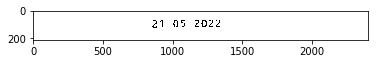

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 2022    True
bel: 21 05 2022    True
osd: 2า οs 2ο22    False
brightness_border is  180
rel: 21 05 2022


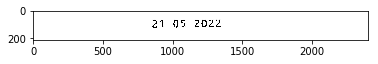

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 2022    True
bel: 21 05 2022    True
osd: 2า οs 2ο22    False
brightness_border is  185
rel: 21 05 2022


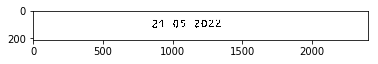

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 2022    True
bel: 21 05 2022    True
osd: 2า οട 2o22    False
brightness_border is  190
rel: 21 05 2022


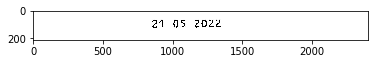

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 2022    True
bel: 21 05 2022    True
osd: 2า οs 2ο22    False
brightness_border is  195
rel: 21 05 2022


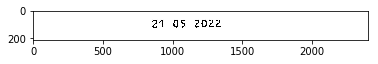

bad: 21 05 2022    True
eng: 21 05 2022    True
rus: 21 05 2022    True
bel: 21 05 2022    True
osd: gา οs 2οεε    False


In [228]:
for brb in list(range(160, 200, 5)):
    print("brightness_border is ", brb)
    image_name = expiration_date(brightness_border=brb)
    img = Image.open(image_name)
    plt_img=mpimg.imread(image_name)
    imgplot = plt.imshow(plt_img)
    best2 = "21 05 1977"
    best3 = "11 09 2002"
    best4 = "21 05 2022"
    best5 = "MP1367595"
    best = best5
    print("rel:", best)
    plt.show()
    img.load()
    with PyTessBaseAPI() as api:
        api.SetImageFile(image_name)
        text = api.GetUTF8Text()[:-1]
        print("bad:", text, "  ", text == best)
    text1 = pytesseract.image_to_string(img, lang='eng')
    print("eng:", text1, "  ", text1 == best)
    text2 = pytesseract.image_to_string(img, lang='rus')
    print("rus:", text2, "  ", text2 == best)
    text3 = pytesseract.image_to_string(img, lang='bel')
    print("bel:", text3, "  ", text3 == best)
    text4 = pytesseract.image_to_string(img, lang='osd')
    print("osd:", text4, "  ", text4 == best)
    
    

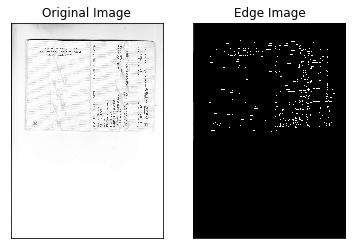

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('out15.jpg',0)
edges = cv.Canny(img,150,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

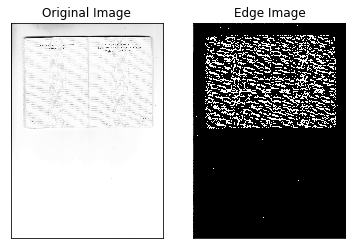

In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imageName = 'out14'
img = Image.open(imageName + '.jpg').convert('L')
img.save(imageName + '_grayscale.jpg')
img = cv.imread(imageName + '_grayscale.jpg',0)
edges = cv.Canny(img,10,20)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
cv.imwrite("edges.jpg", edges)

with open("C_directory/image.txt", "w") as f:
    a = edges.tolist()
    f.write(str(len(a)) + ' ' + str(len(a[0])))
    for i in a:
        for j in i:
            f.write(' ' + str(j))

In [25]:
coords = []
with open("C_directory/coordinates.txt", "r+") as file:
    coords = [int(x) for x in file.readline().split(' ')]
print(coords)
show(Image.open(imageName + ".jpg").convert("RGB"), coords, color="red")

[305, 345, 3855, 2895]


In [25]:
import json
with open('image.json', 'w') as f:
    json.dump(edges.tolist(), f)


In [18]:
img = Image.open("out16.jpg").convert('L')
img.save("out16_grayscale.jpg")